In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta

In [3]:
import pandas as pd


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - relativedelta(years=1)
# Perform a query to retrieve the data and precipitation scores
date_and_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

query_df=pd.DataFrame(date_and_scores,columns=['Date','Precipitation'])
date_index=query_df.set_index('Date')

sorted_data=date_index.sort_values(by='Date',ascending=False)
print(sorted_data)

            Precipitation
Date                     
2017-08-23           0.45
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00
2017-08-22           0.00
...                   ...
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-23            NaN
2016-08-23           0.00

[2230 rows x 1 columns]


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

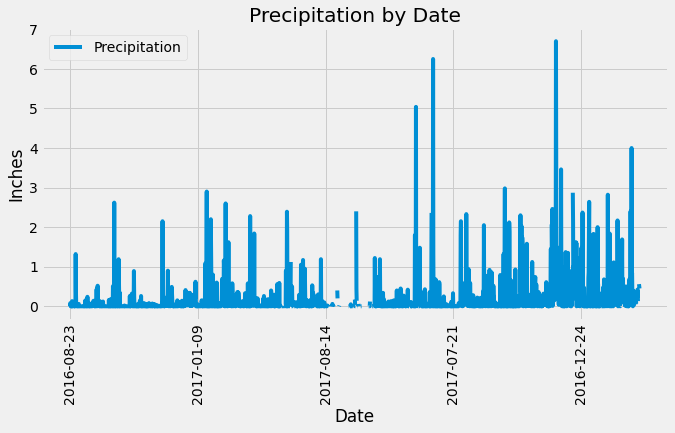

In [13]:
#ax=query_df.plot.bar(x='Date',y='Precipitation', rot=0)
query_df.plot(x='Date', y='Precipitation', rot=90, figsize=(10,5), ylabel='Inches', xlabel='Date', title='Precipitation by Date')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_statistics=sorted_data.describe()
summary_statistics

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Station.station).count()
print(station_total)

9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
from sqlalchemy import func, desc
most_active = session.query(Measurement.station,              
    func.count(Measurement.station).label('qty')
    ).group_by(Measurement.station
    ).order_by(desc('qty')).all()
# List the stations and the counts in descending order.
print(most_active)

# Or for vertical listings:
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(Measurement.station,func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f"Minimum Temparature:{min_temp}")

max_temp = session.query(Measurement.station,func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f"Maximum Tempararture:{max_temp}")


avg_temp= session.query(Measurement.station,func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f"Average Temparature: {avg_temp}")

# or alternate command to just list the values
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

Minimum Temparature:[('USC00519281', 54.0)]
Maximum Tempararture:[('USC00519281', 85.0)]
Average Temparature: [('USC00519281', 71.66378066378067)]


[(54.0, 85.0, 71.66378066378067)]

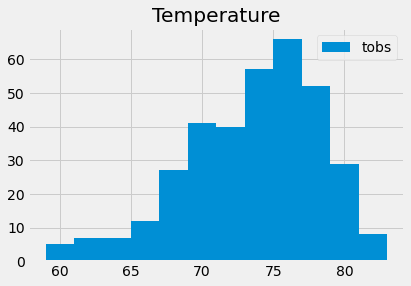

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel_1 = [Measurement.station,Measurement.date,Measurement.tobs]
query_data_2= session.query(*sel_1).filter(Measurement.date>year_ago).\
filter(Measurement.station == 'USC00519281').all()
station_data=pd.DataFrame(query_data_2,columns=['Station','Date','Temperature'])
station_data.set_index('Station')


#plot histogram with 12 bins

station_data.hist(column='Temperature', bins=12,label='tobs')
plt.legend()


# Close session

In [57]:
# Close Session
session.close()